In [64]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
from textwrap import fill
from matplotlib import pyplot as plt
import re
from os import path

In [5]:
merged_csv_file_name = './merged.csv'

kegs = {
    0:
    {
        'species': 'Helobdella robusta',
        'file': '/Users/nata/Documents/genome_project/Orhtonectids_project/annotation/helobdella.keg',
        'suffix': '_helobd',
    },
    1:
    {
        'species': 'Capitella teleta',
        'file': '/Users/nata/Documents/genome_project/Orhtonectids_project/annotation/capitella.keg',
        'suffix': '__capit',
    },
    2:
    {
        'species': 'Intoshia linei',
            'file': '/Users/nata/Documents/genome_project/Orhtonectids_project/int_linn/KEGG_anntotation/Intoshia_linei.keg',
        'suffix': '_intlinn',
    },
    3:
    {
        'species': 'Intoshia variabili',
        'file': '/Users/nata/Documents/genome_project/Orhtonectids_project/annotation/KEGG/Intoshia_variabili.keg',
        'suffix': '_intvar',
    },
}

select_by = 1

exclude = {
    0: ['Brite Hierarchies', 'Human Diseases', 'Not Included in Pathway or Brite', 'Organismal Systems'],  # A
    1: [],                                       # B
    2: ['C5-Branched dibasic acid metabolism', 'Photosynthesis', 'Photosynthesis - antenna proteins', 'Carbon fixation in photosynthetic organisms', 'Carbon fixation pathways in prokaryotes', 'Methane metabolism', 'Nitrogen metabolism', 'Primary bile acid biosynthesis', 'Sulfur metabolism', 'Secondary bile acid biosynthesis', 'Linoleic acid metabolism', 'alpha-Linolenic acid metabolism', 'Lysine biosynthesis', 'D-Arginine and D-ornithine metabolism', 'D-Alanine metabolism', 'Mannose type O-glycan biosynthesis', 'Glycosaminoglycan biosynthesis - chondroitin sulfate / dermatan sulfate', 'Glycosaminoglycan biosynthesis - keratan sulfate', 'Glycosphingolipid biosynthesis - lacto and neolacto series', 'Glycosphingolipid biosynthesis - globo and isoglobo series', 'Lipopolysaccharide biosynthesis', 'Peptidoglycan biosynthesis', 'ipoarabinomannan (LAM) biosynthesis', 'Arabinogalactan biosynthesis - Mycobacterium', 'Monoterpenoid biosynthesis', 'Sesquiterpenoid and triterpenoid biosynthesis', 'Diterpenoid biosynthesis', 'Carotenoid biosynthesis', 'Brassinosteroid biosynthesis', 'Zeatin biosynthesis', 'Type I polyketide structures', 'Biosynthesis of 12-, 14- and 16-membered macrolides', 'Biosynthesis of enediyne antibiotics', 'Biosynthesis of type II polyketide backbone', 'Biosynthesis of type II polyketide products', 'Tetracycline biosynthesis', 'Polyketide sugar unit biosynthesis', 'Nonribosomal peptide structures', 'Biosynthesis of siderophore group nonribosomal peptides', 'Biosynthesis of vancomycin group antibiotics', 'Stilbenoid, diarylheptanoid and gingerol biosynthesis', 'Flavonoid biosynthesis', 'Flavone and flavonol biosynthesis', 'Anthocyanin biosynthesis', 'Isoflavonoid biosynthesis', 'Indole diterpene alkaloid biosynthesis', 'Acridone alkaloid biosynthesis', 'Caffeine metabolism', 'Glucosinolate biosynthesis', 'Benzoxazinoid biosynthesis', 'Penicillin and cephalosporin biosynthesis', 'Carbapenem biosynthesis', 'Clavulanic acid biosynthesis', 'Streptomycin biosynthesis', 'Neomycin, kanamycin and gentamicin biosynthesis', 'Acarbose and validamycin biosynthesis', 'Puromycin biosynthesis', 'Novobiocin biosynthesis', 'Staurosporine biosynthesis', 'Phenazine biosynthesis', 'Prodigiosin biosynthesis', 'Aflatoxin biosynthesis', 'Biosynthesis of secondary metabolites - unclassified', 'Fluorobenzoate degradation', 'Chlorocyclohexane and chlorobenzene degradation', 'Toluene degradation', 'Xylene degradation', 'Nitrotoluene degradation', 'Ethylbenzene degradation', 'Styrene degradation', 'Atrazine degradation', 'Bisphenol degradation', 'Dioxin degradation', 'Naphthalene degradation', 'Polycyclic aromatic hydrocarbon degradation', 'Furfural degradation', 'Steroid degradation', 'Global maps only', 'Phosphotransferase system (PTS)', 'Bacterial secretion system', 'Two-component system', 'MAPK signaling pathway - fly', 'MAPK signaling pathway - plant', 'MAPK signaling pathway - yeast', 'Hippo signaling pathway - fly', 'Hippo signaling pathway - multiple species', 'VEGF signaling pathway', 'Autophagy - yeast','Autophagy - other', 'Mitophagy - yeast', 'Cell cycle - yeast', 'Cell cycle - Caulobacter', 'Meiosis - yeast', 'Oocyte meiosis', 'Apoptosis - fly', 'Apoptosis - multiple species', 'Quorum sensing', 'Biofilm formation - Escherichia coli', 'Fatty acid biosynthesis', 'Synthesis and degradation of ketone bodies', 'Cutin, suberine and wax biosynthesis', 'Phenylalanine, tyrosine and tryptophan biosynthesis', 'beta-Alanine metabolism', 'Taurine and hypotaurine metabolism', 'Phosphonate and phosphinate metabolism', 'Selenocompound metabolism', 'Cyanoamino acid metabolism', 'D-Glutamine and D-glutamate metabolism', 'Various types of N-glycan biosynthesis', 'Mucin type O-glycan biosynthesis', 'Other types of O-glycan biosynthesis', 'Glycosaminoglycan biosynthesis - heparan sulfate / heparin', 'Glycosaminoglycan degradation', 'Glycosphingolipid biosynthesis - ganglio series', 'Other glycan degradation', 'Thiamine metabolism', 'Riboflavin metabolism', 'Vitamin B6 metabolism', 'Nicotinate and nicotinamide metabolism', 'Pantothenate and CoA biosynthesis', 'Biotin metabolism', 'Lipoic acid metabolism', 'Folate biosynthesis', 'One carbon pool by folate', 'Retinol metabolism', 'Porphyrin and chlorophyll metabolism', 'Ubiquinone and other terpenoid-quinone biosynthesis', 'Terpenoid backbone biosynthesis', 'Insect hormone biosynthesis', 'Limonene and pinene degradation', 'Geraniol degradation', 'Biosynthesis of ansamycins', 'Phenylpropanoid biosynthesis', 'Indole alkaloid biosynthesis', 'Isoquinoline alkaloid biosynthesis', 'Tropane, piperidine and pyridine alkaloid biosynthesis', 'Betalain biosynthesis', 'Monobactam biosynthesis', 'Benzoate degradation', 'Aminobenzoate degradation', 'Chloroalkane and chloroalkene degradation', 'Caprolactam degradation', 'Metabolism of xenobiotics by cytochrome P450', 'Drug metabolism - cytochrome P450', 'Drug metabolism - other enzymes', 'Hedgehog signaling pathway - fly', 'Apelin signaling pathway', 'FoxO signaling pathway', 'Plant hormone signal transduction', 'Biofilm formation - Vibrio cholerae', 'Biofilm formation - Pseudomonas aeruginosa', 'Bacterial chemotaxis', 'Flagellar assembly'],                                       # C
    3: []                                        # D
}

In [6]:
def readin_keg(keg_file_name):
    annotation = []
    record_id = 0
    f = open(keg_file_name, 'r')
    for line in f:
        line = line.strip()
        record = {'Pathway name': None,
                  'level': 0,
                  'id': 0,
                  'parent': None,
                  'parent_id': -1,
                  'code': None,
                  'KO': 0,
                  'KO in spec': 0,
                  'gene_number': 0,
                  'seq_id': None,
                  'Pathway short names': None}
        m = re.match(r'(?P<level>^[ABC])[ \t]*(?P<code>[0-9]+) *(?P<label>[^\[\]]+)(?P<p_code>\[.+])?', line)
        if m:
            record['Pathway name'] = m['label'].strip()
            if m['level'] == 'A':
                record['level'] = 0
                record['parent'] = None
                cat_a = m['label'].strip()
                cat_a_id = record_id
            elif m['level'] == 'B':
                record['level'] = 1
                record['parent'] = cat_a
                record['parent_id'] = cat_a_id
                cat_b = m['label'].strip()
                cat_b_id = record_id
            elif m['level'] == 'C':
                record['level'] = 2
                record['parent'] = cat_b
                record['parent_id'] = cat_b_id
                cat_c = m['label'].strip()
                cat_c_id = record_id
            record['code'] = m['code']
            record['id'] = record_id
            record_id += 1
            annotation.append(record)
            continue
        m = re.match(r'^D *(?P<seq_id>[a-zA-Z0-9_.-]+); *(?P<code>K[0-9]+) *(?P<label>.*)', line)
        if m:
            m_l = re.match(r'(?P<short_labels>.+); *(?P<long_label>[^\[\]]+)(?P<e_code>\[.+])?', m['label'])
            if m_l:
                short_labels = []
                for short_label in m_l['short_labels'].split():
                    if short_label.strip():
                        short_labels.append(short_label.strip().replace(',', ''))
                long_label = m_l['long_label'].strip()
                record['Pathway name'] = long_label
                record['level'] = 3
                record['parent'] = cat_c
                record['parent_id'] = cat_c_id
                record['Pathway short names'] = ', '.join(short_labels)
                record['seq_id'] = m['seq_id']
                record['code'] = m['code']
                record['id'] = record_id
                record_id += 1
                annotation.append(record)
                continue
        m = re.match(r'^D *(?P<code>K[0-9]+) *(?P<label>.*)', line)
        if m:
            m_l = re.match(r'(?P<short_labels>.+); *(?P<long_label>[^\[\]]+)(?P<e_code>\[.+])?', m['label'])
            if m_l:
                short_labels = []
                for short_label in m_l['short_labels'].split():
                    if short_label.strip():
                        short_labels.append(short_label.strip().replace(',', ''))
                long_label = m_l['long_label'].strip()
                record['Pathway name'] = long_label
                record['level'] = 3
                record['parent'] = cat_c
                record['parent_id'] = cat_c_id
                record['Pathway short names'] = ', '.join(short_labels)
                #record['seq_id'] = m['seq_id']
                record['code'] = m['code']
                record['id'] = record_id
                record_id += 1
                annotation.append(record)
                continue
    f.close()
    return annotation

In [7]:
annotations = {}
for i in kegs.keys():
    annotations[i] = readin_keg(kegs[i]['file'])

In [8]:
dataframes = {}
for i in kegs.keys():
    dataframes[i] = pd.DataFrame(annotations[i])

In [9]:
for i in kegs.keys():
    directory, file_name = path.split(path.abspath(kegs[i]['file']))
    name, _ = path.splitext(file_name)
    dataframes[i].to_csv(path.join(directory, name + '.csv'))

In [10]:
def has_children(pathway_id, df):
    children = df.loc[df['parent_id'] == pathway_id]['id'].values
    return len(children) > 0

In [11]:
def count_genes(pathway_id, df):
    count = 0
    children = df.loc[df['parent_id'] == pathway_id]['id'].values
    if len(children) == 0:
        if df.loc[df['id'] == pathway_id]['level'].values[0] == 3:
            count = 1
        else:
            count = 0
    else:
        for child in children:
            count += count_genes(child, df)
    df.loc[df.index[df['id'] == pathway_id], 'gene_number'] = count
    return count

In [12]:
def count_ko(pathway_id, df):
    count = 0
    children = df.loc[df['parent_id'] == pathway_id]['id'].values
    if len(children) == 0:
        if df.loc[df['id'] == pathway_id]['level'].values[0] == 3:
            count = 1
        else:
            count = 0
    else:
        childless = []
        for child in children:
            child_count = count_ko(child, df)
            if not has_children(child, df):
                childless.append(child)
            else:
                count += child_count
        count += len(df.loc[df['id'].isin(childless)]['code'].unique())
    df.loc[df.index[df['id'] == pathway_id], 'KO in spec'] = count
    return count

In [13]:
def count_df(df):
    for pathway_id, pathway in df.loc[df['parent_id'] == -1][['id', 'Pathway name']].values:
        print(pathway, end='. ')
        count = count_genes(pathway_id, df)
        print('gene_num =', count, end='. ')
        count = count_ko(pathway_id, df)
        print('KO in spec =', count)

In [14]:
for i in kegs.keys():
    print('\n==>', kegs[i]['species'])
    count_df(dataframes[i])


==> Helobdella robusta
Metabolism. gene_num = 2120. KO in spec = 1402
Genetic Information Processing. gene_num = 1333. KO in spec = 1006
Environmental Information Processing. gene_num = 2916. KO in spec = 1339
Cellular Processes. gene_num = 2091. KO in spec = 1188
Organismal Systems. gene_num = 5499. KO in spec = 2130
Human Diseases. gene_num = 5514. KO in spec = 2766
Brite Hierarchies. gene_num = 8343. KO in spec = 5193
Not Included in Pathway or Brite. gene_num = 277. KO in spec = 186

==> Capitella teleta
Metabolism. gene_num = 3173. KO in spec = 2042
Genetic Information Processing. gene_num = 1307. KO in spec = 1103
Environmental Information Processing. gene_num = 2204. KO in spec = 1625
Cellular Processes. gene_num = 1791. KO in spec = 1371
Organismal Systems. gene_num = 3510. KO in spec = 2375
Human Diseases. gene_num = 4434. KO in spec = 3146
Brite Hierarchies. gene_num = 8440. KO in spec = 6373
Not Included in Pathway or Brite. gene_num = 441. KO in spec = 319

==> Intoshia li

In [15]:
def exclude_from_pathway(pathway, exclude):
    clean_pathway = pathway.copy()
    for exclude_item in exclude:
        index = np.argwhere(clean_pathway[:, 1] == exclude_item)
        clean_pathway = np.delete(clean_pathway, index, axis=0)
    return clean_pathway

In [16]:
def get_pathway(root_id, level=1):
    result = np.empty((0,3), dtype=np.object)
    selected_pathways = dataframes[select_by].loc[dataframes[select_by]['parent_id'] == root_id][['id', 'Pathway name', 'level']].values
    for i in range(selected_pathways.shape[0]):
        if selected_pathways[i, 2] == level:
            result = np.vstack((result, selected_pathways[i]))
        else:
            result = np.vstack((result, get_pathway(selected_pathways[i, 0], level)))
    return result

In [17]:
A_level_pathways_id = get_pathway(-1, 0)
A_level_pathways_id = exclude_from_pathway(A_level_pathways_id, exclude[0])
print(A_level_pathways_id)

[[0 'Metabolism' 0]
 [3353 'Genetic Information Processing' 0]
 [4687 'Environmental Information Processing' 0]
 [6935 'Cellular Processes' 0]]


In [18]:
n = max(kegs.keys())
merged_df = dataframes[n]
while n > 0:
    merged_df = pd.merge(dataframes[n - 1], merged_df,
                         on=['Pathway name', 'parent', 'Pathway short names', 'code', 'KO'],
                         suffixes=(kegs[n - 1]['suffix'],
                                   kegs[n]['suffix']))
    n -= 1

In [19]:
merged_df.to_csv(merged_csv_file_name)

In [115]:
def draw_heatmap(ax, heatmap_data, selected_pathways, species, title='', aspect=1.0,
                 cmap='viridis', max_y_tick_width=80, max_title_width=20, draw_values=False, draw_colorbar=True):
    im = ax.imshow(heatmap_data, cmap=cmap, aspect=aspect)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(species)))
    ax.set_yticks(np.arange(len(selected_pathways[:, 1])))
    # ... and label them with the respective list entries
    ax.set_xticklabels(species)
    y_tick_labels = list(selected_pathways[:, 1])
    for i in range(len(y_tick_labels)):
        y_tick_labels[i] = fill(y_tick_labels[i], max_y_tick_width)
    ax.set_yticklabels(y_tick_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    if draw_values:
        # Loop over data dimensions and create text annotations.
        max_val = max(heatmap_data.ravel())
        for i in range(len(selected_pathways[:, 1])):
            for j in range(len(species)):
                if heatmap_data[i, j] < max_val * 0.75:
                    color = 'w'
                else:
                    color = 'k'
                text = ax.text(j, i, heatmap_data[i, j],
                               ha="center", va="center", color=color)

    ax.set_title(fill(title, max_title_width))
    if draw_colorbar:
        plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)

In [118]:
def draw_all(width, height, selected_pathways, level, count='gene',
             figure_file='temp.pdf', remove_zeros=True,
             aspect=1.0, cmap='viridis', max_y_tick_width=80, max_title_width=20,
             draw_first=True, draw_values=False, draw_colorbar=True):
    for n in range(3):
        selected_pathways = exclude_from_pathway(selected_pathways, exclude[n])
    species = []
    for k in kegs.keys():
        species.append(kegs[k]['species'])
    fig, axes = plt.subplots(nrows=1, ncols=selected_pathways.shape[0] + 1)
    fig.set_size_inches(width, height)
    if count == 'gene':
        heatmap_data = merged_df.loc[merged_df['id' + kegs[select_by]['suffix']].isin(selected_pathways[:, 0])][['gene_number' + kegs[item]['suffix'] for item in kegs.keys()]].values
    else:
        heatmap_data = merged_df.loc[merged_df['id' + kegs[select_by]['suffix']].isin(selected_pathways[:, 0])][['KO in spec' + kegs[item]['suffix'] for item in kegs.keys()]].values
    ax = axes[0]
    if draw_first:
        title = 'Gene number'
        if selected_pathways[0, 2] > 0:
            title = merged_df.loc[merged_df['id' + kegs[select_by]['suffix']] == selected_pathways[0, 0]]['parent'].values[0]
        title = fill(title, 80)
        draw_heatmap(ax, heatmap_data, selected_pathways, species, title=title,
                     aspect=aspect, cmap=cmap,
                     max_y_tick_width=max_y_tick_width, max_title_width=max_title_width,
                     draw_values=draw_values, draw_colorbar=draw_colorbar)
    else:
        ax.remove()
    for k in range(0, selected_pathways.shape[0]):
        title = fill(selected_pathways[k][1], 80)
        selected_pathways_ext = get_pathway(selected_pathways[k][0], level)
        selected_pathways_ext = exclude_from_pathway(selected_pathways_ext, exclude[level])
        if count == 'gene':
            heatmap_data = merged_df.loc[merged_df['id' + kegs[select_by]['suffix']].isin(selected_pathways_ext[:, 0])][['gene_number' + kegs[item]['suffix'] for item in kegs.keys()]].values
        else:
            heatmap_data = merged_df.loc[merged_df['id' + kegs[select_by]['suffix']].isin(selected_pathways_ext[:, 0])][['KO in spec' + kegs[item]['suffix'] for item in kegs.keys()]].values
        if remove_zeros:
            index = []
            for n in range(heatmap_data.shape[0]):
                if np.allclose(heatmap_data[n, 1:], np.zeros(heatmap_data.shape[1] - 1)):
                    index.append(n)
            heatmap_data = np.delete(heatmap_data, index, axis=0)
            selected_pathways_ext = np.delete(selected_pathways_ext, index, axis=0)
        k += 1
        ax = axes[k]
        if (heatmap_data.size == 0):
            ax.remove()
            continue
        draw_heatmap(ax, heatmap_data, selected_pathways_ext, species, title=title,
                     aspect=aspect, cmap=cmap,
                     max_y_tick_width=max_y_tick_width, max_title_width=max_title_width,
                     draw_values=draw_values, draw_colorbar=draw_colorbar)

    fig.tight_layout()
    fig.savefig(figure_file, dpi=300)
    plt.show()

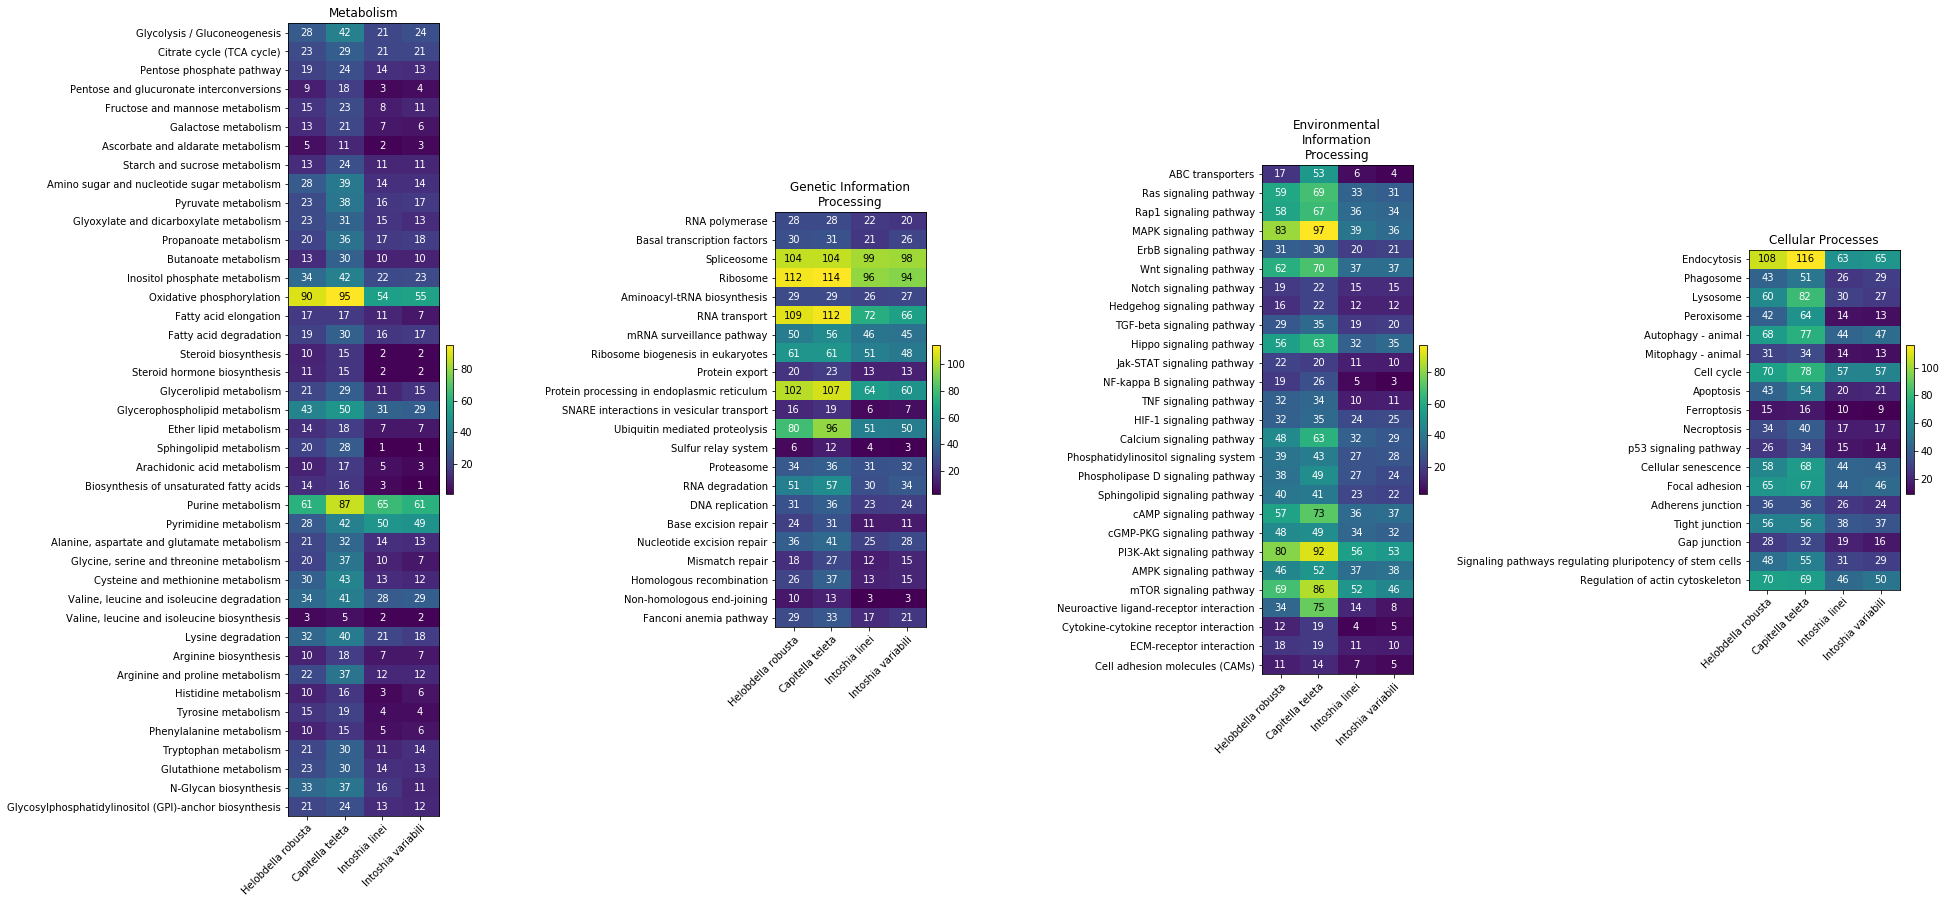

In [129]:
width = 30
height = width * 5
aspect = 0.5
cmap = 'viridis'
level = 2  # A = 0, B = 1, C = 2, D = 3
selected_pathways = A_level_pathways_id
draw_all(width, height, selected_pathways, level, count='KO', figure_file='fig11.eps',
         aspect=aspect, cmap=cmap, max_y_tick_width=80, max_title_width=20,
         draw_first=False, draw_values=True, draw_colorbar=True)

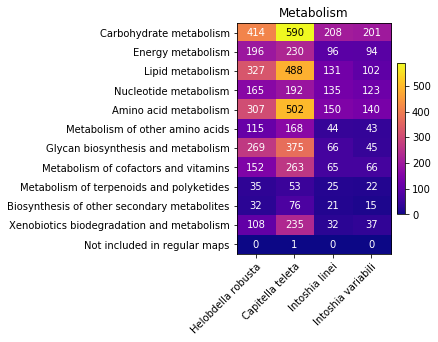

In [124]:
width = 40
height = width
aspect = 0.5
cmap = 'plasma'
level = 1  # A = 0, B = 1, C = 2, D = 3
selected_pathways = get_pathway(A_level_pathways_id[0][0], 1)
draw_all(width, height, selected_pathways, level, count='gene', figure_file='fig22.pdf',
         aspect=aspect, cmap=cmap, max_y_tick_width=80, max_title_width=20,
         draw_first=True, draw_values=True, draw_colorbar=True)

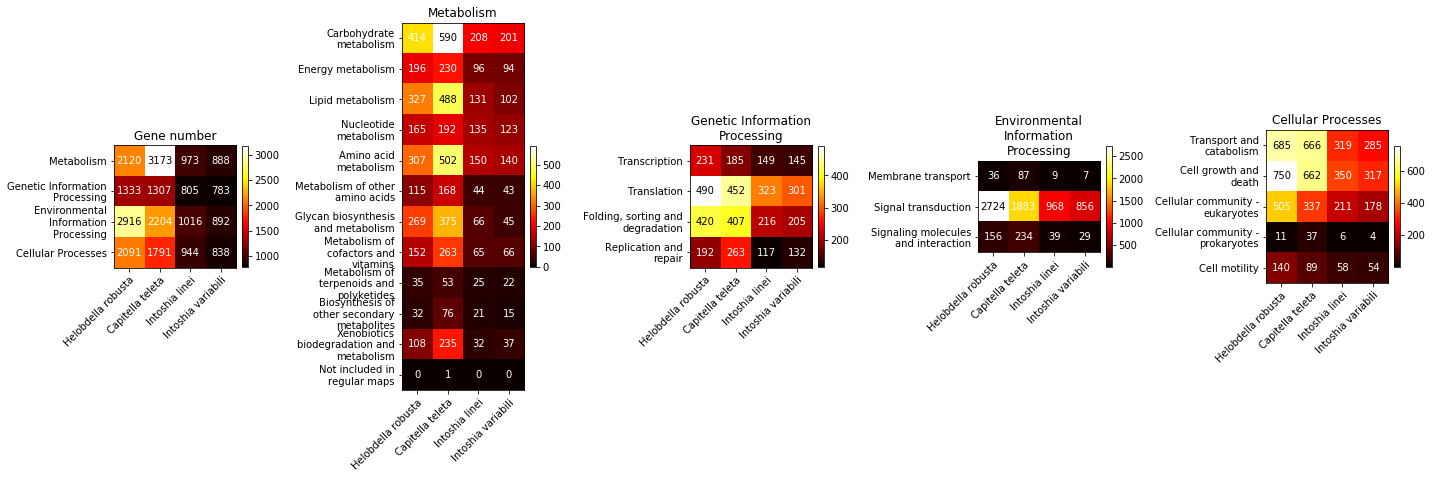

In [125]:
width = 20
height = width / 2
aspect = 1.0
cmap = 'hot'
level = 1  # A = 0, B = 1, C = 2, D = 3
selected_pathways = A_level_pathways_id
draw_all(width, height, selected_pathways, level, count='gene', figure_file='fig22.pdf',
         aspect=aspect, cmap=cmap, max_y_tick_width=20, max_title_width=20,
         draw_first=True, draw_values=True, draw_colorbar=True)

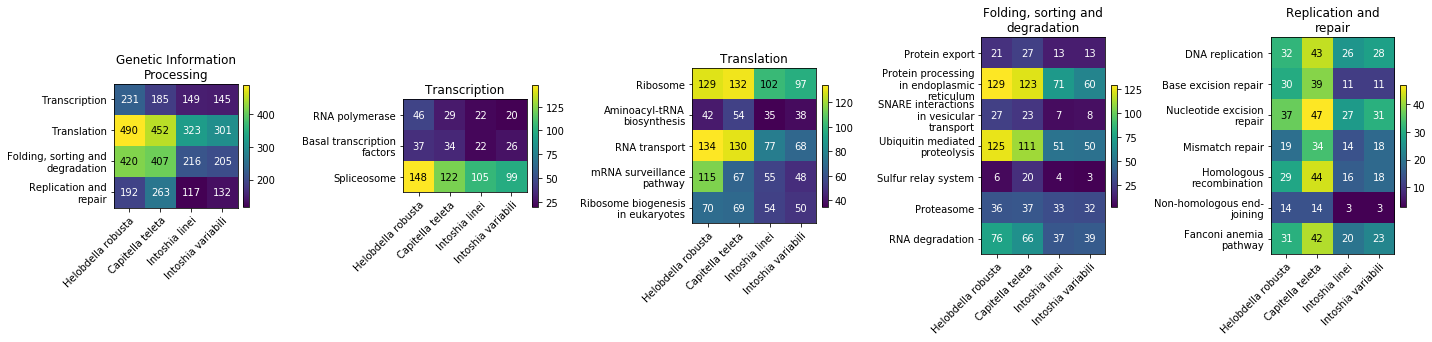

In [126]:
width = 20
height = width * 5
aspect=1.0
cmap='viridis'
level = 2  # A = 0, B = 1, C = 2, D = 3
selected_pathways = get_pathway(A_level_pathways_id[1][0], 1)
draw_all(width, height, selected_pathways, level, count='gene', figure_file='fig22.pdf',
         aspect=aspect, cmap=cmap, max_y_tick_width=20, max_title_width=20,
         draw_first=True, draw_values=True, draw_colorbar=True)

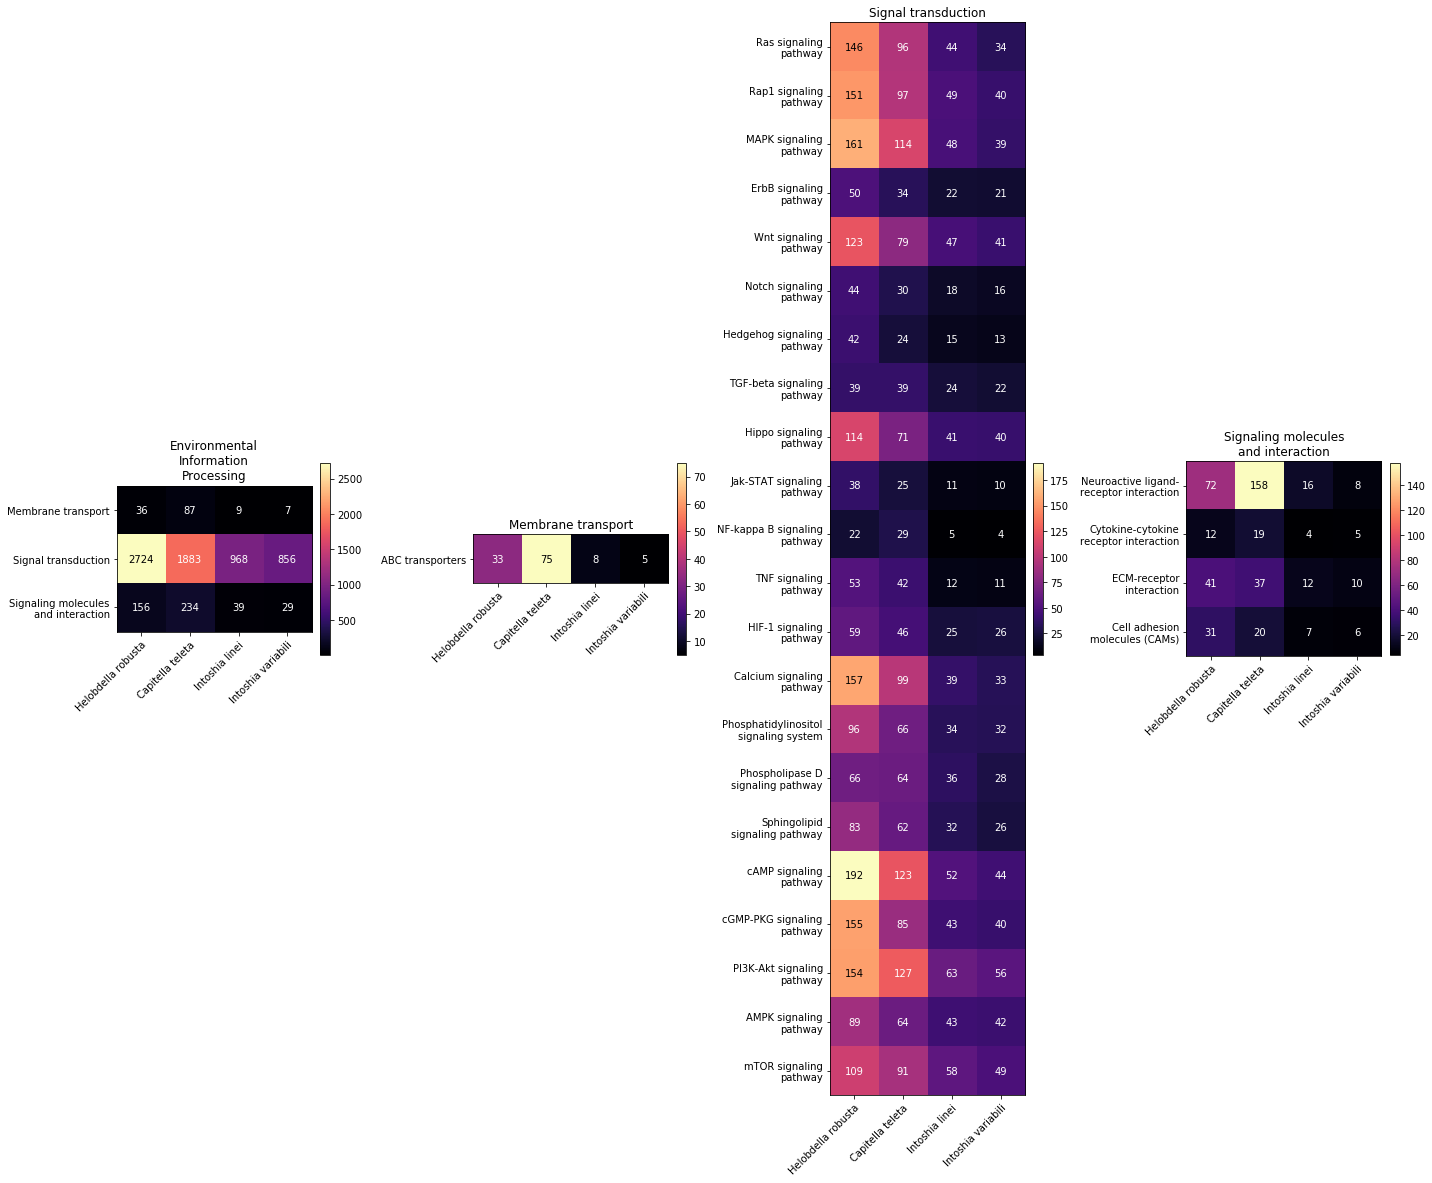

In [127]:
width = 20
height = width * 5
aspect=1.0
cmap='magma'
level = 2  # A = 0, B = 1, C = 2, D = 3
selected_pathways = get_pathway(A_level_pathways_id[2][0], 1)
draw_all(width, height, selected_pathways, level, count='gene', figure_file='fig22.pdf',
         aspect=aspect, cmap=cmap, max_y_tick_width=20, max_title_width=20,
         draw_first=True, draw_values=True, draw_colorbar=True)